# Will McFarland

## Research question/interests
I would like to analyze the librosa data to learn more about how a genre might be able to be identified by the auditory features of a song.

## Task 1 - Exploratory Data Analysis

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm

Lets look at tracks first.
Loading the data

In [2]:
tracks = pd.read_csv("../data/raw/tracks.csv", low_memory=False)

What does the data look like at a glance?

In [3]:
tracks

,Unnamed: 0,album,album.1,album.2,album.3,album.4,album.5,album.6,album.7,album.8,...,track.10,track.11,track.12,track.13,track.14,track.15,track.16,track.17,track.18,track.19
0,NaN,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
1,track_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106571,155316,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
106572,155317,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
106573,155318,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
106574,155319,0,2017-03-30 15:20:35,2017-02-17 00:00:00,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,...,NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths


There's quite a few columns in this dataset, but what are they? Unfortunetly the column names are kind of spread between the first 2 rows (i.e. the row pandas assigned to the header and row 0), so lets print those 2 values together for each column.

In [4]:
tracks.iloc[0] # This will print the row header and the vale at row 0 for each column

Unnamed: 0                  NaN
album                  comments
album.1            date_created
album.2           date_released
album.3                engineer
album.4               favorites
album.5                      id
album.6             information
album.7                 listens
album.8                producer
album.9                    tags
album.10                  title
album.11                 tracks
album.12                   type
artist        active_year_begin
artist.1        active_year_end
artist.2      associated_labels
artist.3                    bio
artist.4               comments
artist.5           date_created
artist.6              favorites
artist.7                     id
artist.8               latitude
artist.9               location
artist.10             longitude
artist.11               members
artist.12                  name
artist.13      related_projects
artist.14                  tags
artist.15               website
artist.16        wikipedia_page
set     

We will properly rename all of the columns in the analysis pipeline, but for the purposes of this EDA, lets just look at a few columns and rename them manually. We will also drop rows with missing values here.

In [5]:
track_subset = tracks[['Unnamed: 0', 'track.7', 'artist.12', 'album.2']].rename(columns={'Unnamed: 0': 'track id', 'track.7': 'genre', 'artist.12': 'artist name', 'album.2': 'release date'}).dropna(axis=0, how='any')
track_subset

,track id,genre,artist name,release date
2,2,Hip-Hop,AWOL,2009-01-05 00:00:00
3,3,Hip-Hop,AWOL,2009-01-05 00:00:00
4,5,Hip-Hop,AWOL,2009-01-05 00:00:00
5,10,Pop,Kurt Vile,2008-02-06 00:00:00
11,134,Hip-Hop,AWOL,2009-01-05 00:00:00
...,...,...,...,...
106570,155315,Rock,Spowder,2017-02-17 00:00:00
106571,155316,Rock,Spowder,2017-02-17 00:00:00
106572,155317,Rock,Spowder,2017-02-17 00:00:00
106573,155318,Rock,Spowder,2017-02-17 00:00:00


So we have genre, artist name, and release date. Lets graph it!

Starting with just genre...

<AxesSubplot:>

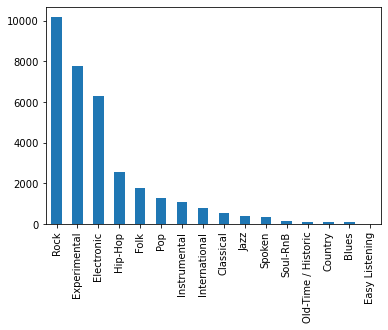

In [6]:
plt.figure()
genre_sizes = track_subset.iloc[:, 1].value_counts()
genre_sizes.plot(kind='bar')

This shows a histogram of number of tracks per genre in the dataset.

We also have release dates, so let's see genres over time...

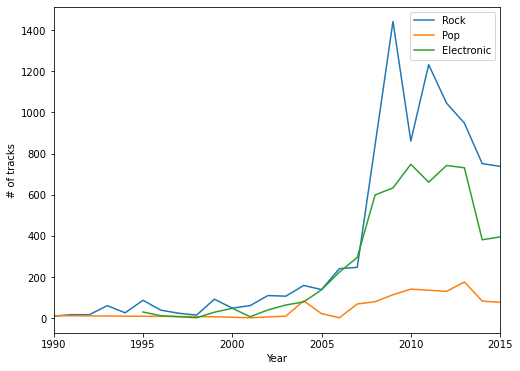

In [7]:
plt.figure(figsize=(8,6))

# Add column that is just year
track_subset['year'] = pd.DatetimeIndex(track_subset['release date']).year

# Get value counts of year and genre together
genres_years = track_subset[['year', 'genre']]
genres_years  = pd.DataFrame(track_subset[['year', 'genre']].value_counts()).reset_index().rename(columns={0: 'count'}).sort_values(['year', 'genre'])

#plt.plot(genres_years.loc[genres_years['genre'] == 'Rock', 'year'], genres_years.loc[genres_years['genre'] == 'Rock', 'count'])
# Plot number of tracks per year by genre
# for g in genres_years['genre'].unique():
for g in ['Rock', 'Pop', 'Electronic']:
    plt.plot(genres_years.loc[genres_years['genre'] == g, 'year'], genres_years.loc[genres_years['genre'] == g, 'count'], label=g)

# Most of our data is between 1990 and 2015
plt.xlim([1990, 2015])

# Lables
plt.xlabel('Year')
plt.ylabel('# of tracks')

# Show legend
plt.legend()

More than anything this just shows us the distribution of our sample by genre and year. We would need a normalized sample to create an accurate graph of genre distribution over time.

In addition to the tracks data we also have audio analysis data from a library called Librosa.
The Librosa features data is quite large - 106578 rows (same as tracks) and 519 columns (about 10 times that of tracks).
The librosa data is almo much more abstract and harder to understand than the metadata we looked at previously so lets start with just one column.

The first features column we will look at is Root Mean Square Energy (RMSE), which represents the energy of a given cell of audio.
Let's import the data and merge it with the metadata. The features data conveniently comes with a track id that we can match with the metadata.

In [8]:
rmse = pd.read_csv("../data/raw/features.csv", skiprows=[0,1,2], usecols=[0, 395])
rmse = rmse.rename(columns={"track_id":"track id", "Unnamed: 395":"rmse_mean"})
track_subset['track id'] = track_subset['track id'].astype(int) # Track ID needs to be int type (it starts as string for some reason)
rmse_meta = pd.merge(track_subset, rmse, on="track id", how="inner") # Combine metadata with RMSE

<AxesSubplot:xlabel='genre', ylabel='rmse_mean'>

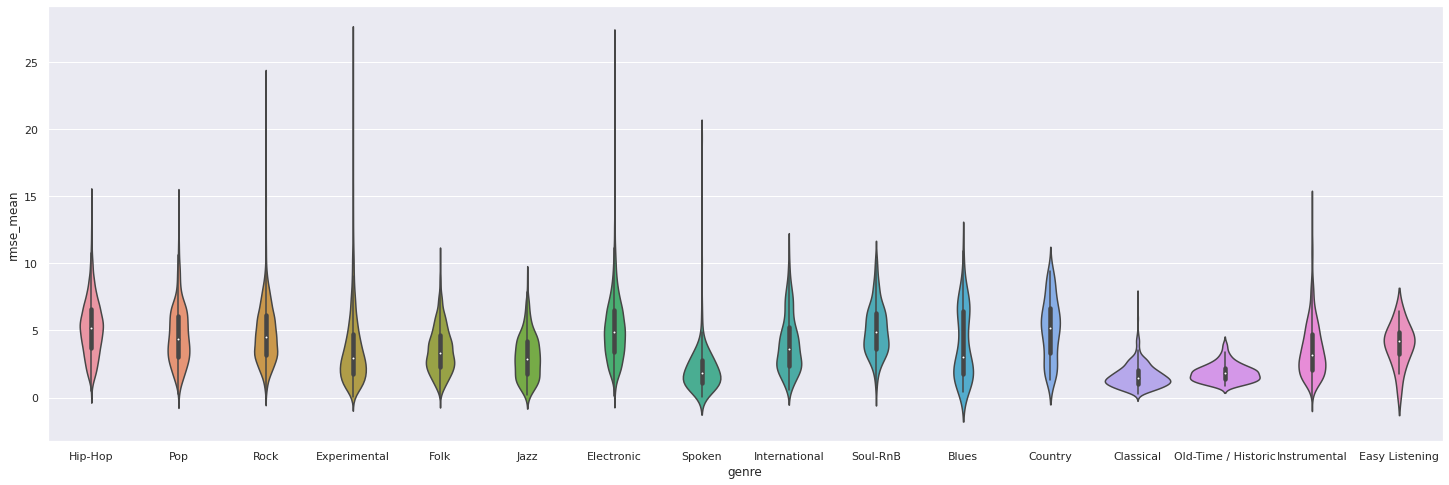

In [9]:
sns.set(rc={'figure.figsize':(25,8)})
sns.violinplot(x = rmse_meta['genre'], y = rmse_meta['rmse_mean'])

This shows the distribution of energy levels for tracks by genre. The violin plot does a good job of showing where these distributions. To get a little more close-up though lets look at historgrams for a few individual genres.

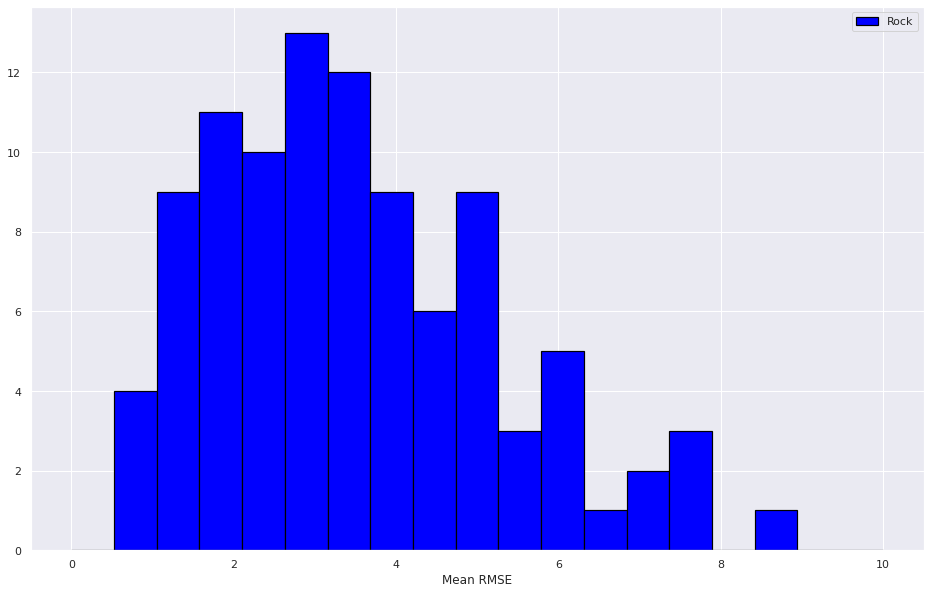

In [10]:
plt.figure(figsize=(16,10))

# Take equally sized samples for 3 genres that exemplify different energies: Rock, Jazz, Electronic
rock = rmse_meta.loc[rmse_meta['genre'] == 'Rock', 'rmse_mean'].head(100)
hiphop = rmse_meta.loc[rmse_meta['genre'] == 'Hip-Hop', 'rmse_mean'].head(100)
spoken = rmse_meta.loc[rmse_meta['genre'] == 'Spoken', 'rmse_mean'].head(100)

bins = np.linspace(0, 10, 20)

plt.hist(rock, bins, label='Rock', color='blue', edgecolor='black', linewidth=1.2)
plt.xlabel('Mean RMSE')
plt.legend()

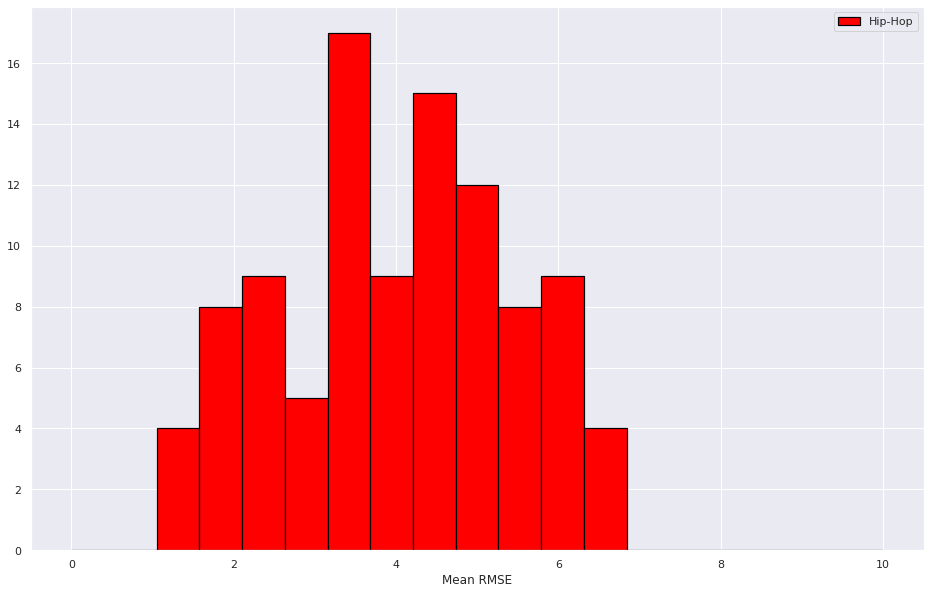

In [11]:
plt.figure(figsize=(16,10))
plt.hist(hiphop, bins, label='Hip-Hop', color='red', edgecolor='black', linewidth=1.2)
plt.xlabel('Mean RMSE')
plt.legend()

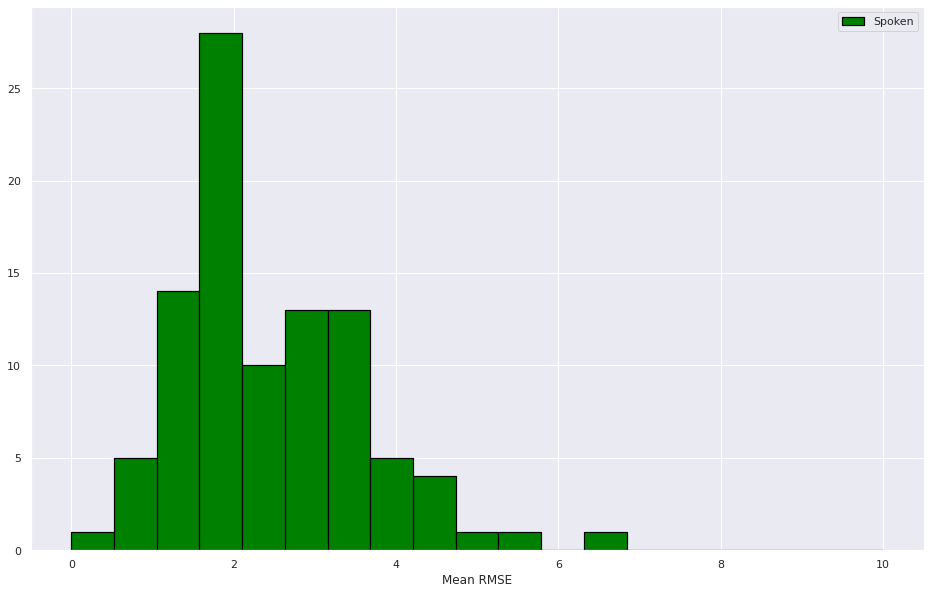

In [12]:
plt.figure(figsize=(16,10))
plt.hist(spoken, bins, label='Spoken', color='green', edgecolor='black', linewidth=1.2)
plt.xlabel('Mean RMSE')
plt.legend()

These histograms are perfect for showing what energy levels each genre is most likely to have. Unfortunetely we don't have any genres in our dataset that have consistently high energies such as metal, but we do have enough variety to see some trends and differences. For example, rock encompasses a very wide range of energies (rock ballads vs hard rock for ex.). Comparing this to hip-hop, we see a much more consistent level of energy due to the more narrow variety of energies encompassed in that genre (at least in the sample tracks in this dataset). Spoken-word audio makes for a good benchmark as we expect that to be consistently low-energy, which we see in the final histogram.

Coming back to my research question, I want to try to identify genre from the features data. Energy on its own is not enough to do this as there is so much overlap between genres. For that, the most useful attributes will actually be the Mel-Frequency Cepstral Coefficients (MFCCs). The MFCC data is spread across 20 columns, each representing a different coefficient in the result.

In [13]:
cols = [0] + list(range(293,314)) # Range of coumns for mfcc in features

mfcc = pd.read_csv("../data/raw/features.csv", skiprows=[0,1,2], usecols=cols)
# This rename statement got kind of complicated, but essentially its just renaming these as mfcc1-20
mfcc = mfcc.rename(columns=lambda x: 'mfcc' + str(int(x[x.index(':')+1:]) - 292) if ':' in x else 'track id' )
mfcc_meta = pd.merge(rmse_meta, mfcc, on="track id")
mfcc_meta

,track id,genre,artist name,release date,year,rmse_mean,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21
0,2,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.188761,-163.772964,116.696678,-41.753826,29.144329,...,-0.794632,-6.920971,-3.655366,1.465213,0.201078,3.998204,-2.114676,0.116842,-5.785884,-143.594299
1,3,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.607359,-159.004166,120.158501,-33.233562,47.342003,...,6.949284,-4.175256,-3.528815,0.274716,-2.270682,1.090475,-2.343884,0.471821,-1.546707,-140.036758
2,5,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.251386,-205.440491,132.215073,-16.085823,41.514759,...,0.594473,-0.340203,2.377888,7.899487,1.947641,7.441950,-1.739911,0.278015,-5.489016,-181.015961
3,10,Pop,Kurt Vile,2008-02-06 00:00:00,2008,3.893810,-135.864822,157.040085,-53.453247,17.198896,...,1.679479,-6.218249,1.844195,-4.099704,0.779950,-0.559577,-1.018324,-3.807545,-0.679533,-113.085472
4,134,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.310689,-207.661484,125.521309,-33.416592,32.260929,...,5.968948,2.341039,3.134924,4.580719,-0.493938,0.490930,-2.718678,-0.770406,-3.995600,-180.516342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33507,155315,Rock,Spowder,2017-02-17 00:00:00,2017,3.276360,-201.342438,160.025528,-29.940956,28.508636,...,2.853957,1.190131,-4.657537,1.916379,-1.110450,-0.483898,-7.172850,-0.184265,-4.653941,-153.478851
33508,155316,Rock,Spowder,2017-02-17 00:00:00,2017,3.855573,-182.828827,178.104462,-29.699032,37.093895,...,0.903461,0.485896,-5.959884,-0.401464,-2.150971,-1.475158,-9.450092,-1.887284,-3.642568,-158.330338
33509,155317,Rock,Spowder,2017-02-17 00:00:00,2017,2.543875,-228.317474,159.710739,-15.973267,35.369766,...,2.271309,1.673417,-3.109162,1.503421,1.782223,-0.435400,-6.891376,-1.327178,-1.674107,-201.487259
33510,155318,Rock,Spowder,2017-02-17 00:00:00,2017,2.920029,-193.422867,160.749878,-33.325577,29.675579,...,2.965941,1.556483,-2.838488,-0.148982,-0.378652,-1.360567,-8.394647,-1.492843,-3.758327,-174.247559


Now lets see how this data looks split up by genre. We don't really have room here to visualize all 20 coefficients separately, so we will just look at a couple.

<AxesSubplot:xlabel='genre', ylabel='mfcc16'>

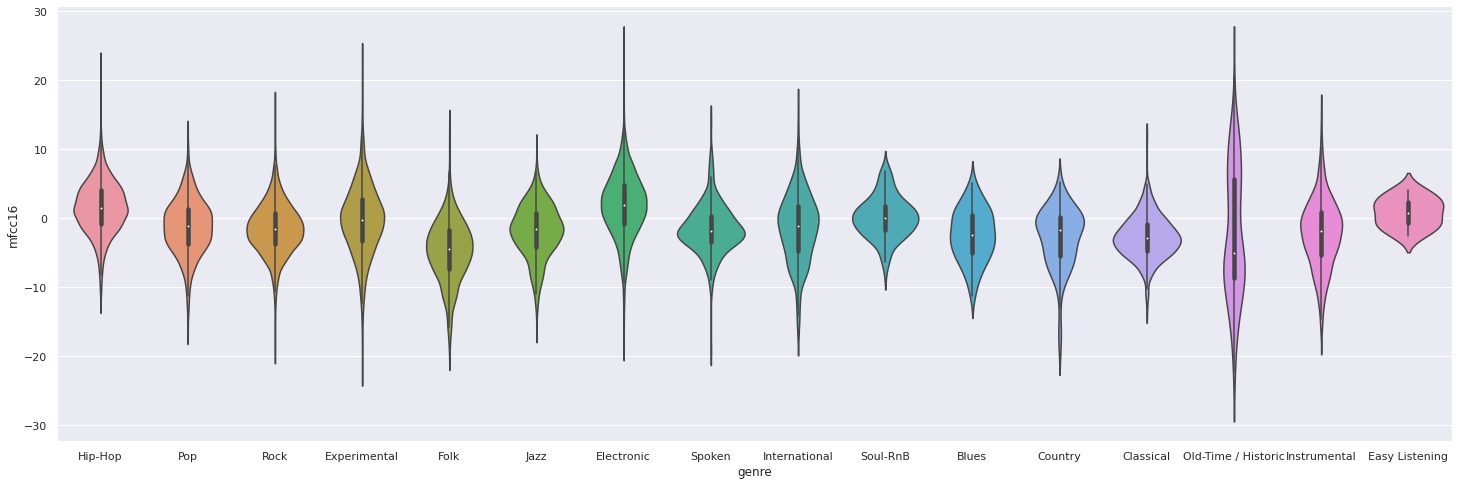

In [14]:
sns.violinplot(x = mfcc_meta['genre'], y = mfcc_meta["mfcc16"])

<AxesSubplot:xlabel='genre', ylabel='mfcc12'>

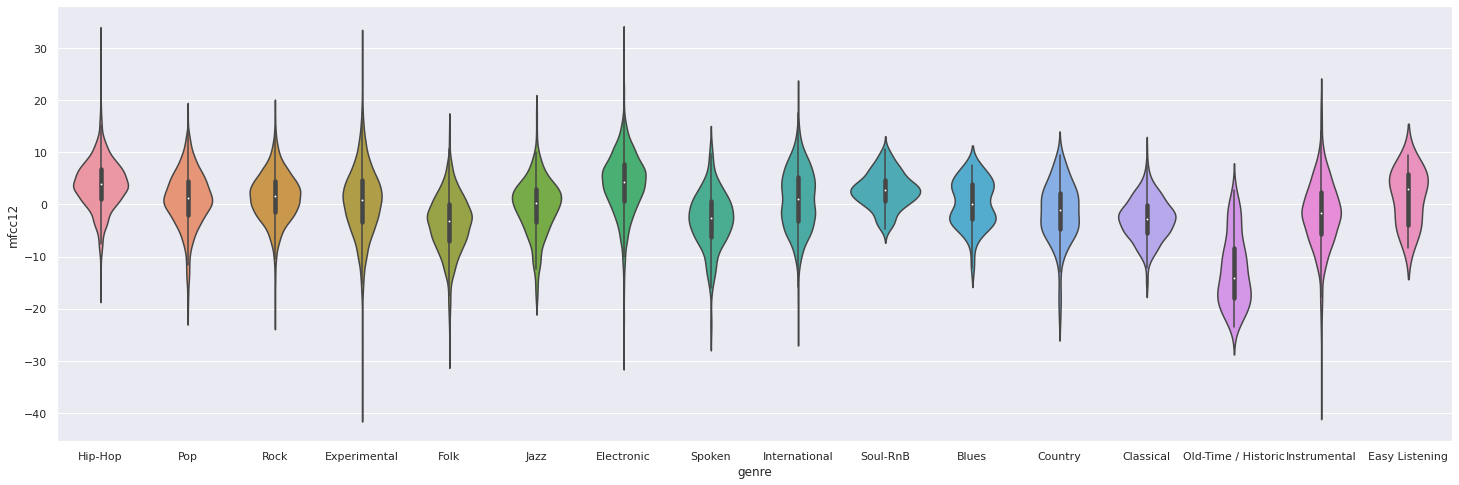

In [15]:
sns.violinplot(x = mfcc_meta['genre'], y = mfcc_meta["mfcc12"])

These graphs don't mean a whole lot on their own without a detailed explanation of what the different mfcc coefficients represent (outside of the scope of this project), mfcc has less intrinsic meaning than say energy does.
We will be come back to these MFCCs later in the analysis section to help us identify genres.

## Task 2 - Analysis Pipeline - Tracks

### Tracks metadata

Tracks data starts on row 4, and the first 2 rows should be combined to form the column names. We will also remove rows with null values and select only columns that we are likely to use.

In [16]:
# Load the data
tracks = pd.read_csv("../data/raw/tracks.csv", low_memory=False)
for i in range(0, len(tracks.columns)):
    # Remove dot and number at end of original name
    orig = re.sub('[\\.][0-9]*', '', tracks.columns[i]) # Use a regex to remove dot followed by any number of numeric digits
    tracks.columns.values[i] = orig + ' ' + str(tracks.iloc[0,i]) # Append specific name (first column after names) to orig 

# Now remove first 2 rows after column titles
tracks = tracks.drop([0, 1])

# Rename first unnamed column to id
tracks.columns.values[0] = 'id'

tracks.head()

,id,album comments,album date_created,album date_released,album engineer,album favorites,album id,album information,album listens,album producer,...,track information,track interest,track language_code,track license,track listens,track lyricist,track number,track publisher,track tags,track title
2,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
4,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,...,NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
5,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,...,NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
6,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,...,NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [17]:
tracks = tracks[['id', 'track title', 'artist name', 'album title', 'track genre_top']]

In [18]:
tracks

,id,track title,artist name,album title,track genre_top
2,2,Food,AWOL,AWOL - A Way Of Life,Hip-Hop
3,3,Electric Ave,AWOL,AWOL - A Way Of Life,Hip-Hop
4,5,This World,AWOL,AWOL - A Way Of Life,Hip-Hop
5,10,Freeway,Kurt Vile,Constant Hitmaker,Pop
6,20,Spiritual Level,Nicky Cook,Niris,NaN
...,...,...,...,...,...
106571,155316,The Auger,Spowder,"Live at Monty Hall, 2/17/2017",Rock
106572,155317,Let's Skin Ruby,Spowder,"Live at Monty Hall, 2/17/2017",Rock
106573,155318,My House Smells Like Kim Deal/Pulp,Spowder,"Live at Monty Hall, 2/17/2017",Rock
106574,155319,The Man With Two Mouths,Spowder,"Live at Monty Hall, 2/17/2017",Rock


### Librosa Data
Like in the EDA, we will use just one column.
In a third dataframe we will combine the tracks metadata and the rmse data.

In [19]:
# RMSE
rmse = pd.read_csv("../data/raw/features.csv", nrows=6000, skiprows=[0,1,2], usecols=[0, 395])
rmse = rmse.rename(columns={"track_id":"track id", "Unnamed: 395":"rmse_mean"})
track_subset['track id'] = track_subset['track id'].astype(int) # Track ID needs to be int type (it starts as string for some reason)
rmse_meta = pd.merge(track_subset, rmse, on="track id", how="inner") # Combine metadata with RMSE

# MFCC
cols = [0] + list(range(293,314)) # list of coumns we want to use for mfcc
mfcc = pd.read_csv("../data/raw/features.csv", skiprows=[0,1,2], usecols=cols)
# This rename statement got kind of complicated, but essentially its just renaming these as mfcc1-20
mfcc = mfcc.rename(columns=lambda x: 'mfcc' + str(int(x[x.index(':')+1:]) - 292) if ':' in x else 'track id' )
mfcc_meta = pd.merge(rmse_meta, mfcc, on="track id")
mfcc_meta

,track id,genre,artist name,release date,year,rmse_mean,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21
0,2,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.188761,-163.772964,116.696678,-41.753826,29.144329,...,-0.794632,-6.920971,-3.655366,1.465213,0.201078,3.998204,-2.114676,0.116842,-5.785884,-143.594299
1,3,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.607359,-159.004166,120.158501,-33.233562,47.342003,...,6.949284,-4.175256,-3.528815,0.274716,-2.270682,1.090475,-2.343884,0.471821,-1.546707,-140.036758
2,5,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.251386,-205.440491,132.215073,-16.085823,41.514759,...,0.594473,-0.340203,2.377888,7.899487,1.947641,7.441950,-1.739911,0.278015,-5.489016,-181.015961
3,10,Pop,Kurt Vile,2008-02-06 00:00:00,2008,3.893810,-135.864822,157.040085,-53.453247,17.198896,...,1.679479,-6.218249,1.844195,-4.099704,0.779950,-0.559577,-1.018324,-3.807545,-0.679533,-113.085472
4,134,Hip-Hop,AWOL,2009-01-05 00:00:00,2009,3.310689,-207.661484,125.521309,-33.416592,32.260929,...,5.968948,2.341039,3.134924,4.580719,-0.493938,0.490930,-2.718678,-0.770406,-3.995600,-180.516342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3816,11019,Experimental,Lucky Dragons,2008-07-01 00:00:00,2008,4.932507,-185.376068,136.597931,20.122082,26.883036,...,-4.463337,-3.422913,2.475758,-10.997784,-5.183612,-11.623643,-5.401146,-1.495220,3.086915,-176.448990
3817,11020,Experimental,Lucky Dragons,2008-07-01 00:00:00,2008,3.130701,-211.766693,166.640518,-12.184427,9.050328,...,0.677591,-2.675961,-0.216218,1.553534,2.590819,-0.467983,-0.750476,-5.816559,-5.636709,-228.376617
3818,11039,Rock,Farmer's Boulevard,2006-04-13 00:00:00,2006,7.073012,-50.330505,121.375748,-45.230354,54.819553,...,5.473498,2.101278,6.493683,0.695305,-0.204810,-0.831377,-3.771076,2.459276,-4.712732,-40.801430
3819,11040,Rock,Farmer's Boulevard,2006-04-13 00:00:00,2006,6.547755,-69.300369,125.952202,-44.207775,53.792545,...,4.364284,2.025035,3.599195,0.232899,-0.428950,-0.910346,-3.756835,2.323310,-6.553806,-46.339893


The mfcc_meta dataframe contains all of our selected data, so all analyses may be done based on this dataframe.

## Task 3: Method chaining - functions can be found in `project_functions1.py`

### Tracks Metadata

In [20]:
# Load the data (load outside of method chain so tracks is reset every time this code snippet is run
tracks = pd.read_csv("../data/raw/tracks.csv", low_memory=False)

tracks = (
    tracks
    # Append specific name (row 0) to column name 
    .rename(columns=lambda x: x + ' ' + str(tracks.loc[0, x]))
    # Remove dot and number at end of original name
    .rename(columns=lambda x: re.sub("[\\.][0-9]*", "", x)) # Use a regex to remove dot followed by any number of numeric digits
    # Now remove first 2 rows after column titles
    .drop([0, 1])
    # Rename first unnamed column to id
    .rename(columns={'Unnamed: 0 nan': 'track id'})
    # Select just the columns we will be using for the analysis
    .loc[:, ['track id', 'track title', 'artist name', 'album title', 'track genre_top']]
    # Drop rows with na values
    .dropna()
)
# Cast track id to int (cannot apply astype to only a single column in method chain)
tracks['track id'] = tracks['track id'].astype(int)

tracks


,track id,track title,artist name,album title,track genre_top
2,2,Food,AWOL,AWOL - A Way Of Life,Hip-Hop
3,3,Electric Ave,AWOL,AWOL - A Way Of Life,Hip-Hop
4,5,This World,AWOL,AWOL - A Way Of Life,Hip-Hop
5,10,Freeway,Kurt Vile,Constant Hitmaker,Pop
11,134,Street Music,AWOL,AWOL - A Way Of Life,Hip-Hop
...,...,...,...,...,...
106570,155315,Space Power Over-Watch Destroying Evil Rats,Spowder,"Live at Monty Hall, 2/17/2017",Rock
106571,155316,The Auger,Spowder,"Live at Monty Hall, 2/17/2017",Rock
106572,155317,Let's Skin Ruby,Spowder,"Live at Monty Hall, 2/17/2017",Rock
106573,155318,My House Smells Like Kim Deal/Pulp,Spowder,"Live at Monty Hall, 2/17/2017",Rock


### Features data

Start with dataframe of just features data, and rename the columns.

In [21]:
# Load data; skip first 3 rows as they are just metadata headers. Use only track id and RMSE columns
cols = [0] + list(range(293,314)) + [395] # list of coumns we want to use
features = pd.read_csv("../data/raw/features.csv", skiprows=[0,1,2], usecols=cols)

features = (
    features
    # Rename track id and rmse mean
    .rename(columns={"track_id":"track id", "Unnamed: 395":"rmse_mean"})
    # Rename 20 mfcc columns via lambda function
    .rename(columns=lambda x: 'mfcc' + str(int(x[x.index(':')+1:]) - 292) if ':' in x else x)
)

# Merge features and tracks data
data = (
    pd.merge(tracks, features, on="track id")
)
data

,track id,track title,artist name,album title,track genre_top,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,rmse_mean
0,2,Food,AWOL,AWOL - A Way Of Life,Hip-Hop,-163.772964,116.696678,-41.753826,29.144329,-15.050158,...,-6.920971,-3.655366,1.465213,0.201078,3.998204,-2.114676,0.116842,-5.785884,-143.594299,3.188761
1,3,Electric Ave,AWOL,AWOL - A Way Of Life,Hip-Hop,-159.004166,120.158501,-33.233562,47.342003,-6.247318,...,-4.175256,-3.528815,0.274716,-2.270682,1.090475,-2.343884,0.471821,-1.546707,-140.036758,3.607359
2,5,This World,AWOL,AWOL - A Way Of Life,Hip-Hop,-205.440491,132.215073,-16.085823,41.514759,-7.642954,...,-0.340203,2.377888,7.899487,1.947641,7.441950,-1.739911,0.278015,-5.489016,-181.015961,3.251386
3,10,Freeway,Kurt Vile,Constant Hitmaker,Pop,-135.864822,157.040085,-53.453247,17.198896,6.868035,...,-6.218249,1.844195,-4.099704,0.779950,-0.559577,-1.018324,-3.807545,-0.679533,-113.085472,3.893810
4,134,Street Music,AWOL,AWOL - A Way Of Life,Hip-Hop,-207.661484,125.521309,-33.416592,32.260929,8.074771,...,2.341039,3.134924,4.580719,-0.493938,0.490930,-2.718678,-0.770406,-3.995600,-180.516342,3.310689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49283,155315,Space Power Over-Watch Destroying Evil Rats,Spowder,"Live at Monty Hall, 2/17/2017",Rock,-201.342438,160.025528,-29.940956,28.508636,-2.578976,...,1.190131,-4.657537,1.916379,-1.110450,-0.483898,-7.172850,-0.184265,-4.653941,-153.478851,3.276360
49284,155316,The Auger,Spowder,"Live at Monty Hall, 2/17/2017",Rock,-182.828827,178.104462,-29.699032,37.093895,8.704657,...,0.485896,-5.959884,-0.401464,-2.150971,-1.475158,-9.450092,-1.887284,-3.642568,-158.330338,3.855573
49285,155317,Let's Skin Ruby,Spowder,"Live at Monty Hall, 2/17/2017",Rock,-228.317474,159.710739,-15.973267,35.369766,12.634752,...,1.673417,-3.109162,1.503421,1.782223,-0.435400,-6.891376,-1.327178,-1.674107,-201.487259,2.543875
49286,155318,My House Smells Like Kim Deal/Pulp,Spowder,"Live at Monty Hall, 2/17/2017",Rock,-193.422867,160.749878,-33.325577,29.675579,4.634390,...,1.556483,-2.838488,-0.148982,-0.378652,-1.360567,-8.394647,-1.492843,-3.758327,-174.247559,2.920029


Testing the project function module:

In [22]:
import project_functions1 as p1
df_main = p1.chain()

df_main

,track id,track title,artist name,album title,genre,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,rmse_mean
0,2,Food,AWOL,AWOL - A Way Of Life,Hip-Hop,-163.772964,116.696678,-41.753826,29.144329,-15.050158,...,-6.920971,-3.655366,1.465213,0.201078,3.998204,-2.114676,0.116842,-5.785884,-143.594299,3.188761
1,3,Electric Ave,AWOL,AWOL - A Way Of Life,Hip-Hop,-159.004166,120.158501,-33.233562,47.342003,-6.247318,...,-4.175256,-3.528815,0.274716,-2.270682,1.090475,-2.343884,0.471821,-1.546707,-140.036758,3.607359
2,5,This World,AWOL,AWOL - A Way Of Life,Hip-Hop,-205.440491,132.215073,-16.085823,41.514759,-7.642954,...,-0.340203,2.377888,7.899487,1.947641,7.441950,-1.739911,0.278015,-5.489016,-181.015961,3.251386
3,10,Freeway,Kurt Vile,Constant Hitmaker,Pop,-135.864822,157.040085,-53.453247,17.198896,6.868035,...,-6.218249,1.844195,-4.099704,0.779950,-0.559577,-1.018324,-3.807545,-0.679533,-113.085472,3.893810
4,134,Street Music,AWOL,AWOL - A Way Of Life,Hip-Hop,-207.661484,125.521309,-33.416592,32.260929,8.074771,...,2.341039,3.134924,4.580719,-0.493938,0.490930,-2.718678,-0.770406,-3.995600,-180.516342,3.310689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49283,155315,Space Power Over-Watch Destroying Evil Rats,Spowder,"Live at Monty Hall, 2/17/2017",Rock,-201.342438,160.025528,-29.940956,28.508636,-2.578976,...,1.190131,-4.657537,1.916379,-1.110450,-0.483898,-7.172850,-0.184265,-4.653941,-153.478851,3.276360
49284,155316,The Auger,Spowder,"Live at Monty Hall, 2/17/2017",Rock,-182.828827,178.104462,-29.699032,37.093895,8.704657,...,0.485896,-5.959884,-0.401464,-2.150971,-1.475158,-9.450092,-1.887284,-3.642568,-158.330338,3.855573
49285,155317,Let's Skin Ruby,Spowder,"Live at Monty Hall, 2/17/2017",Rock,-228.317474,159.710739,-15.973267,35.369766,12.634752,...,1.673417,-3.109162,1.503421,1.782223,-0.435400,-6.891376,-1.327178,-1.674107,-201.487259,2.543875
49286,155318,My House Smells Like Kim Deal/Pulp,Spowder,"Live at Monty Hall, 2/17/2017",Rock,-193.422867,160.749878,-33.325577,29.675579,4.634390,...,1.556483,-2.838488,-0.148982,-0.378652,-1.360567,-8.394647,-1.492843,-3.758327,-174.247559,2.920029


## Task 4 - Analysis

Research question: Analyze the librosa data to learn more about how a genre might be able to be identified by the auditory features of a song.

Conveniently, our dataset comes with a sample analysis that gives a great example as to how this might be done. For reference, that can be found [here](https://nbviewer.org/github/mdeff/fma/blob/outputs/usage.ipynb).

Taking a similar approach to that analysis, I can answer my research question quite consisely using support vector classification.

In [23]:
# Take 80% of rows in df_main as training data
train_ind = int(len(df_main) * 0.8)
train = df_main.loc[0:train_ind]
# Test data will be the remaining 20%
test = df_main.loc[train_ind:]

# y is genre data (the classes aka repsonse variable)
y_train = train['genre']
y_test = test['genre']

# X is mfcc data (predictor for our model)
X_train = train.iloc[:, 5:]
X_test = test.iloc[:, 5:]

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[0], np.unique(y_train).size))

# Be sure training samples are shuffled.
X_train, y_train = skl.utils.shuffle(X_train, y_train, random_state=42)

# Standardize features by removing the mean and scaling to unit variance.
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

# Support vector classification.
clf = skl.svm.SVC()
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print('Accuracy: {:.2%}'.format(score))

39431 training examples, 9858 testing examples
39431 features, 16 classes
Accuracy: 53.28%


Wow look at that it worked! Maybe only about 50% accurate, but that's crazy to think the model was actually able to identify songs from the mfcc data!

Unfortunetely this number isn't very exciting to look at, so lets throw some graphs out there.

Vector support models can be graphed with decision surfaces, however my attempt below did not yield a very pretty result (mostly due to the model's relatively low accuracy, and teh fact that we can only show 10% of our predictors at once). Don't worry though, there's more visualizations to come.

/home/will/miniconda3/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
No handles with labels found to put in legend.


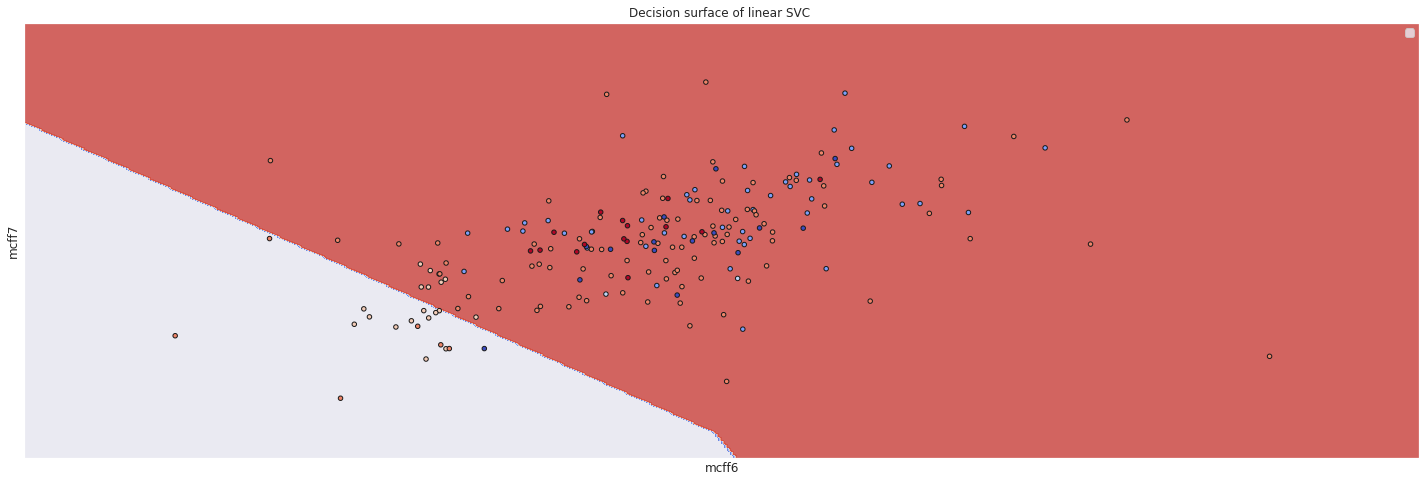

In [24]:
# Reference: https://towardsdatascience.com/support-vector-machines-svm-clearly-explained-a-python-tutorial-for-classification-problems-29c539f3ad8

X = X_test.iloc[0:200, [15,17]]
genres = list(pd.unique(y_test))
y = []
for y_ in y_test.iloc[0:200]:
    y.append(genres.index(y_))

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf_, xx, yy, **params):
    Z = clf_.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = skl.svm.SVC(kernel='linear')
clf2 = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0 = X.iloc[:, 0]
X1 = X.iloc[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf2, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('mcff7')
ax.set_xlabel('mcff6')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

Finally, as a more conclusive visualization, lets look at a pairs plot of all of our mfcc predictors coloured by genre.

In [ ]:
data = pd.DataFrame(df_main.iloc[:, 4:])
sns.pairplot(data, hue="genre")